# Comparación de Clasificación de Subjetividad y Agrupación por Sentimiento

Este notebook realiza una comparación exhaustiva entre los diferentes métodos de clasificación de subjetividad implementados:

## Métodos a Comparar
1. **HuggingFace (SubjetividadConHF)**: Clasificación binaria (Subjetivo/Objetivo)
2. **Análisis por Frases (SubjetividadConFrases)**: Clasificación ternaria (Subjetivo/Objetivo/Mixta)  
3. **LLM (SubjetividadConLLM)**: Clasificación ternaria (Subjetivo/Objetivo/Mixta)

## Análisis a Realizar
- Comparación HF vs Frases: transiciones y cambios en clasificación
- Comparación Frases vs LLM: análisis de coincidencias entre métodos ternarios
- Agrupación final por sentimiento para el método seleccionado

In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

sys.path.append('../scripts')

from subjetividad import (
    cargar_datos_para_comparacion,
    realizar_comparacion_completa,
    generar_visualizaciones_completas,
    ComparadorMetodosSubjetividad,
    analizar_discrepancias_completas
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías y módulos importados correctamente")

✅ Librerías y módulos importados correctamente


## 1. Carga de Datos

Cargamos el dataset con los análisis de subjetividad ya realizados por los diferentes métodos.

In [2]:
df = cargar_datos_para_comparacion('../data/processed/dataset_opiniones_analisis.csv')

✅ Dataset cargado: 2464 opiniones
📋 Columnas de subjetividad disponibles: ['SubjetividadConHF', 'SubjetividadConFrases', 'SubjetividadConLLM']


## 2. Comparación HuggingFace vs Análisis por Frases

Análisis de transiciones entre la clasificación binaria de HuggingFace y la clasificación ternaria del análisis por frases.

In [3]:
comparador = ComparadorMetodosSubjetividad(df)
resultados_hf_frases = comparador.comparar_hf_vs_frases()
comparador.mostrar_comparacion_hf_frases(resultados_hf_frases)

🔄 COMPARACIÓN: HuggingFace vs Análisis por Frases

📊 Tabla de Contingencia:
SubjetividadConFrases  Mixta  Objetivo  Subjetivo   All
SubjetividadConHF                                      
Objetivo                 142        50          0   192
Subjetivo               1432        13        827  2272
All                     1574        63        827  2464

📈 Transiciones desde Subjetivo (HF): 2272 opiniones
   • Permanece Subjetivo: 827 (36.4%)
   • Se vuelve Mixta: 1432 (63.0%)
   • Se vuelve Objetivo: 13 (0.6%)

📉 Transiciones desde Objetivo (HF): 192 opiniones
   • Permanece Objetivo: 50 (26.0%)
   • Se vuelve Mixta: 142 (74.0%)
   • Se vuelve Subjetivo: 0 (0.0%)


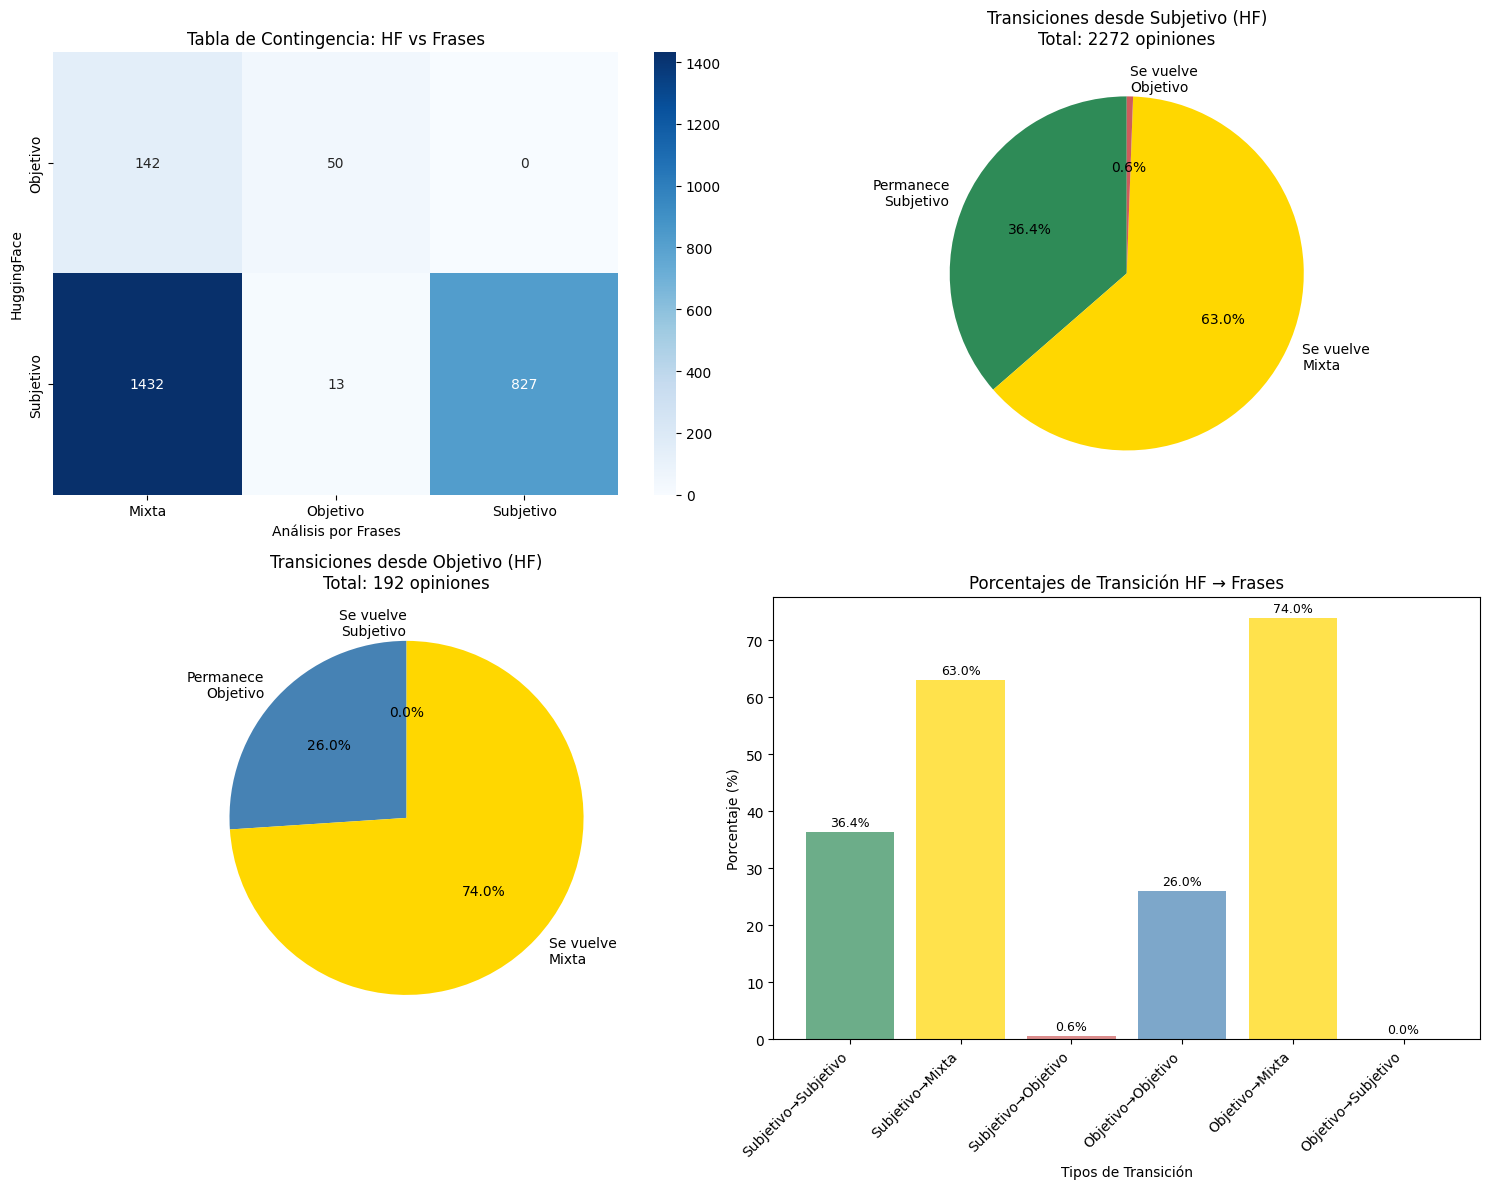

In [4]:
comparador.visualizar_comparacion_hf_frases(resultados_hf_frases)

## 3. Comparación Análisis por Frases vs LLM (Solo Coincidencias)

Análisis enfocado únicamente en las opiniones donde ambos métodos coinciden en la clasificación.

In [5]:
resultados_frases_llm = comparador.comparar_frases_vs_llm_coincidencias()
comparador.mostrar_comparacion_frases_llm(resultados_frases_llm)

🔄 COMPARACIÓN: Análisis por Frases vs LLM (Solo Coincidencias)

📊 Tabla de Contingencia Completa:
SubjetividadConLLM     Mixta  Objetiva  Subjetiva   All
SubjetividadConFrases                                  
Mixta                   1342         9        223  1574
Objetivo                  48        12          3    63
Subjetivo                423         0        404   827
All                     1813        21        630  2464

🎯 Resumen de Coincidencias:
   • Total de opiniones: 2464
   • Coincidencias totales: 1342
   • Porcentaje de coincidencia: 54.5%

📈 Coincidencias por Tipo:
   • Mixta: 1342 opiniones (85.3% de coincidencia)

📋 Distribución en Análisis por Frases:
   • Mixta: 1574 (63.9%)
   • Subjetivo: 827 (33.6%)
   • Objetivo: 63 (2.6%)

📋 Distribución en LLM:
   • Mixta: 1813 (73.6%)
   • Subjetiva: 630 (25.6%)
   • Objetiva: 21 (0.9%)


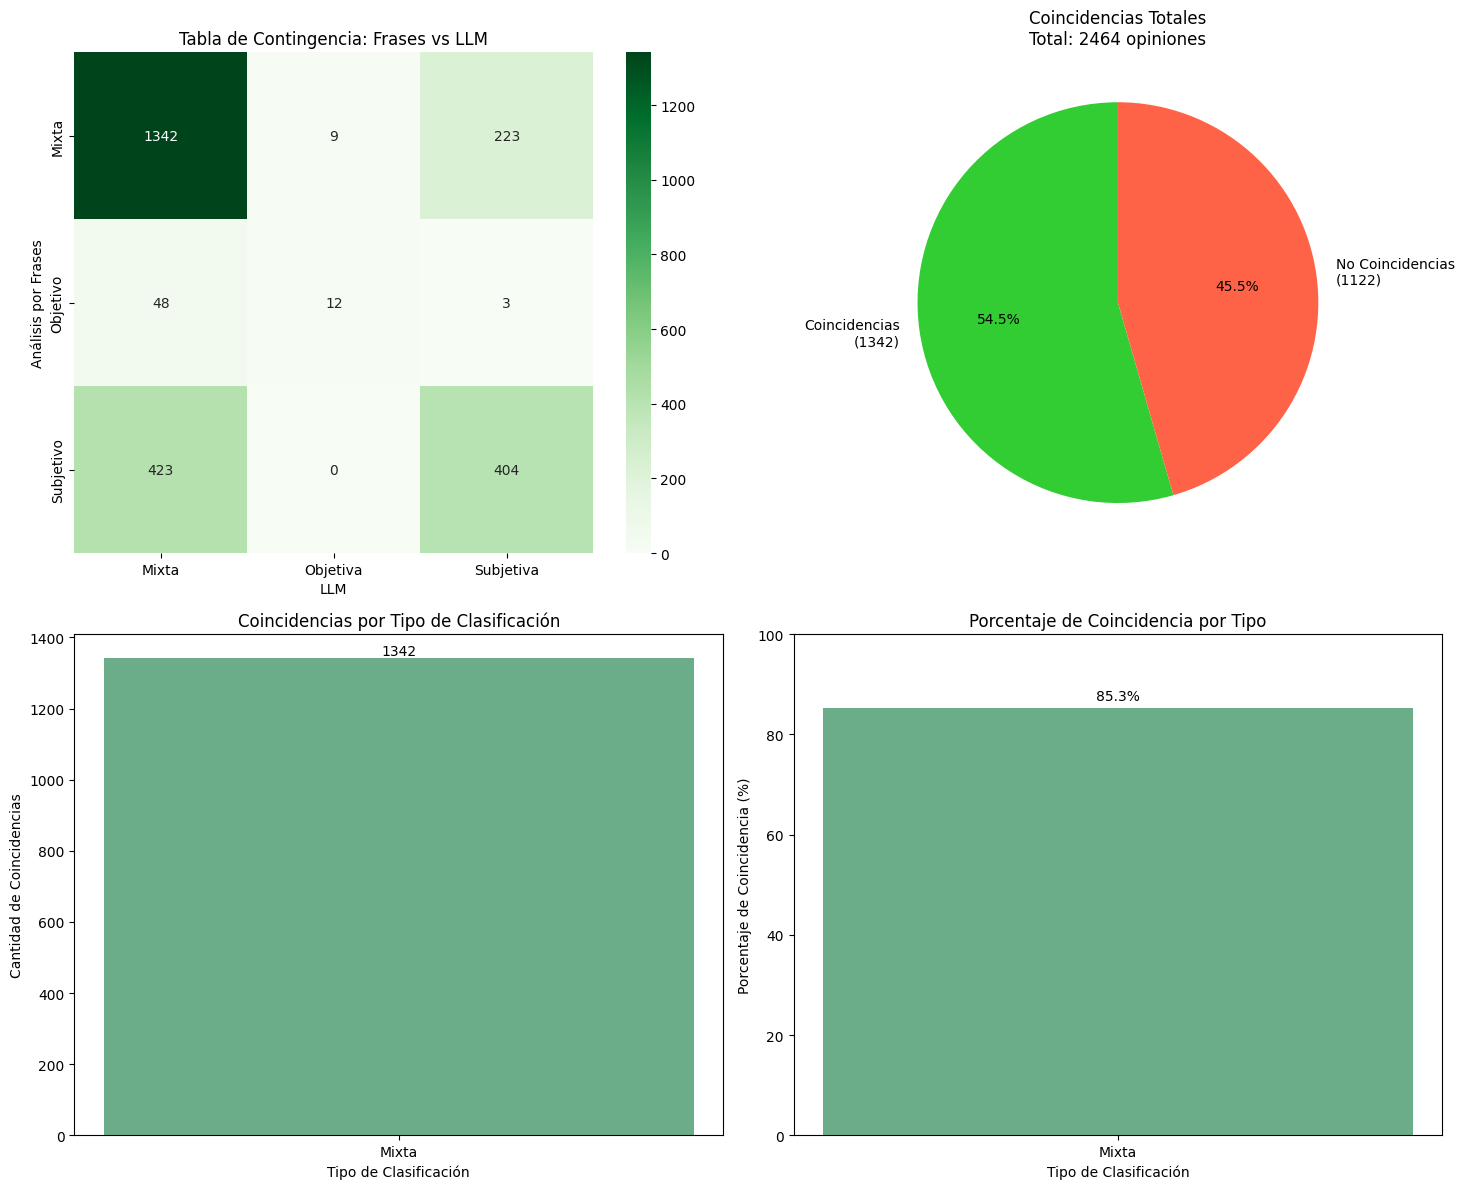

In [6]:
comparador.visualizar_comparacion_frases_llm(resultados_frases_llm)

## 4. Resumen Comparativo de Métodos

Análisis de distribuciones y características de cada método para facilitar la selección del mejor enfoque.

In [7]:
print("📊 RESUMEN DE DISTRIBUCIONES POR MÉTODO")
print("=" * 60)

metodos = ['SubjetividadConHF', 'SubjetividadConFrases', 'SubjetividadConLLM']
for metodo in metodos:
    if metodo in df.columns:
        print(f"\n🔹 {metodo}:")
        distribucion = df[metodo].value_counts()
        total = len(df)
        for categoria, cantidad in distribucion.items():
            porcentaje = (cantidad / total * 100)
            print(f"   • {categoria}: {cantidad} ({porcentaje:.1f}%)")

print(f"\n📋 Total de opiniones analizadas: {len(df)}")

📊 RESUMEN DE DISTRIBUCIONES POR MÉTODO

🔹 SubjetividadConHF:
   • Subjetivo: 2272 (92.2%)
   • Objetivo: 192 (7.8%)

🔹 SubjetividadConFrases:
   • Mixta: 1574 (63.9%)
   • Subjetivo: 827 (33.6%)
   • Objetivo: 63 (2.6%)

🔹 SubjetividadConLLM:
   • Mixta: 1813 (73.6%)
   • Subjetiva: 630 (25.6%)
   • Objetiva: 21 (0.9%)

📋 Total de opiniones analizadas: 2464


## 4.1. Análisis Detallado de Discrepancias

Examen de casos específicos donde los métodos difieren en sus clasificaciones para entender mejor las fortalezas y debilidades de cada enfoque.

In [8]:
resultados_discrepancias = analizar_discrepancias_completas(df, n_ejemplos=3)


🔍 ANÁLISIS DE DISCREPANCIAS ENTRE MÉTODOS
📊 Métodos comparados: SubjetividadConHF vs SubjetividadConFrases
📈 Total de discrepancias: 1587
📋 Total de opiniones: 2464
📊 Porcentaje de discrepancias: 64.4%

🔄 TIPOS DE DISCREPANCIAS:
--------------------------------------------------

🔸 Subjetivo → Mixta
   Cantidad: 1432 (90.2% de las discrepancias)
   
📝 Ejemplos:
      1. "La playa con el mejor azul. Es la playa con el azul más intenso de cancun vale la pena ir aunque el ..."
         SubjetividadConHF: Subjetivo | SubjetividadConFrases: Mixta

      2. "Una de las estructuras más importantes de Puerto Vallarta. El Centro Puerto Vallarta es un lugar des..."
         SubjetividadConHF: Subjetivo | SubjetividadConFrases: Mixta

      3. "Línea va rápido. Espera a estar al sol. La línea va muy rápido. Hermoso museo. 5o piso no abierto y ..."
         SubjetividadConHF: Subjetivo | SubjetividadConFrases: Mixta


🔸 Subjetivo → Objetivo
   Cantidad: 13 (0.8% de las discrepancias)
   
📝 Ejempl

## 5. Conclusiones y Próximos Pasos

### Criterios para Selección del Mejor Método:

1. **Consistencia**: Nivel de coincidencia entre métodos similares
2. **Granularidad**: Capacidad de detectar opiniones mixtas  
3. **Distribución**: Balance entre las diferentes categorías
4. **Interpretabilidad**: Facilidad para entender los resultados
5. **Análisis de Discrepancias**: Patrones en los casos donde los métodos difieren

### Próximos Pasos:
Una vez seleccionado el método de subjetividad preferido, se procederá con:
- Agrupación por sentimiento (Positivo, Neutro, Negativo)
- Análisis cruzado de subjetividad y sentimiento
- Identificación de patrones por ciudad y atracción